In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Average Internal Energy

In [57]:
# constants
h = 6.626*10**-34 # J s
T = np.linspace(300, 1200, 4)  # in Kelvin
R = 8.314  # J/mol·K
K_B = 1.380649 * 10**-(23) # J / K
#hcNa = 1.986e-23 * 6.022e23  # J·mol^-1·cm
#F = hcNa

theta_vib = 4227 # K
theta_rot = 15.02 # K
Do = 427.8 * 1000 # J/mol
De = 445.2 * 1000 # J/mol
N = 1

# energy calculations
beta = 1 / (K_B * T)

In [58]:
E_trans = (3/2) * R * T
#E_elec = -N * De
E_elec = 0
E_rot = R * T
E_vib = R*theta_vib/2 + (R * (theta_vib /(np.exp(theta_vib/T))-1))
E_total = E_elec + E_trans + E_rot + E_vib
E_total = E_total / 1000 # converts to kJ

E_approx = 5/2 * R * T / 1000
E_theo = (5/2 * R ) * T / 1000

print(E_elec)
print(E_rot)
print(E_vib)
print(E_total)
print(E_approx)

0
[2494.2 4988.4 7482.6 9976.8]
[17563.35170749 17593.96139378 17884.03008892 18600.94887379]
[23.79885171 30.06496139 36.59053009 43.54294887]
[ 6.2355 12.471  18.7065 24.942 ]


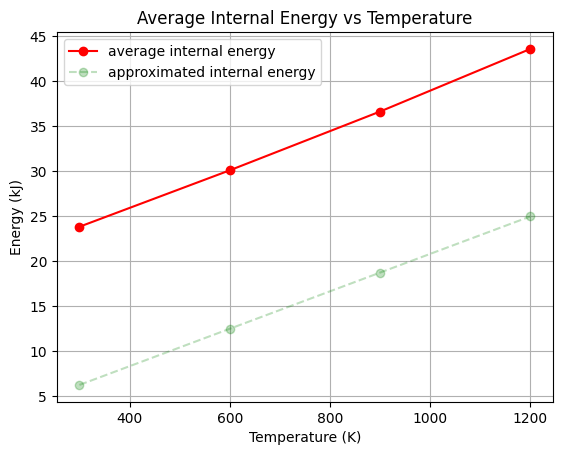

In [59]:
# plots
plt.plot(T, E_total, label = 'average internal energy', marker='o', color='red')
plt.plot(T, E_approx,label='approximated internal energy' , marker='o', color='green', linestyle = '--', alpha = 0.25)
#plt.plot(T,E_theo,label='theoretical',color='blue',linestyle='--', alpha = 0.5)
#plt.plot(T, E_total2,label='approximated average internal energy 2' , marker='x', color='orange', linestyle = '--', alpha = 0.45)
#plt.text(800, 15, '$E=\\frac{5}{2}RT$', color='green')
#plt.text(400, 27, '$E=\\frac{5}{2}RT + vib + rot$', color='red')
#plt.text(400, 20, 'This implies that vib and rot \n terms are not negligible', color='black')
plt.legend()
plt.ylabel('Energy (kJ)')
plt.xlabel('Temperature (K)')
plt.title('Average Internal Energy vs Temperature')
plt.grid(True)
plt.show()

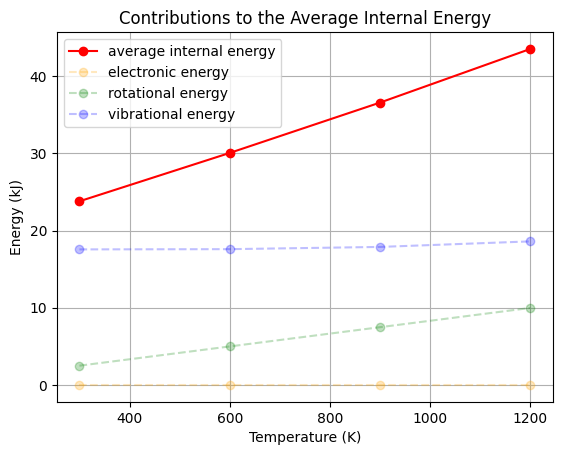

In [60]:
# individual contributions
E_elec = [0, 0, 0, 0]
E_rot = R * T / 1000
E_vib = (R*theta_vib/2 + (R * (theta_vib /(np.exp(theta_vib/T))-1)))/1000

plt.plot(T, E_total, label = 'average internal energy', marker='o', color='red')
plt.plot(T, E_elec, label = 'electronic energy', marker = 'o', color='orange', linestyle = '--', alpha = 0.25)
plt.plot(T, E_rot, label = 'rotational energy', marker = 'o', color='green', linestyle = '--', alpha = 0.25)
plt.plot(T, E_vib, label = 'vibrational energy', marker = 'o', color='blue', linestyle = '--', alpha = 0.25)



plt.legend()
plt.ylabel('Energy (kJ)')
plt.xlabel('Temperature (K)')
plt.title('Contributions to the Average Internal Energy')
plt.grid(True)
plt.show()

# Total Molar Heat Capacity

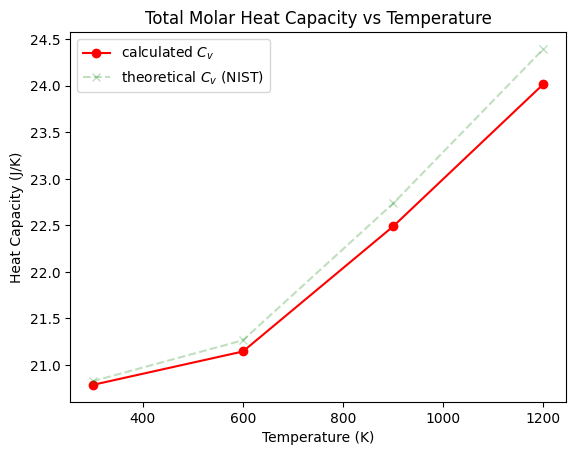

In [61]:
# Calculated based on Cv = dU/dT
T = np.linspace(300, 1200, 4)  # in Kelvin
calc = (5*R/2) + R*(theta_vib/T)**2 * ((np.exp(theta_vib/T) /(np.exp(theta_vib/T)-1)**2))

T_hcl = [300, 600, 900, 1200]
Cp = [29.14, 29.58, 31.05, 32.71]
theo = [cp - R for cp in Cp]

plt.plot(T, calc, label = 'calculated $C_v$', marker='o', color='red')
plt.plot(T_hcl, theo, label = 'theoretical $C_v$ (NIST)', marker='x', color='green', linestyle = '--', alpha = 0.25)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.title('Total Molar Heat Capacity vs Temperature')
plt.legend()
plt.show()




# Fraction of Components

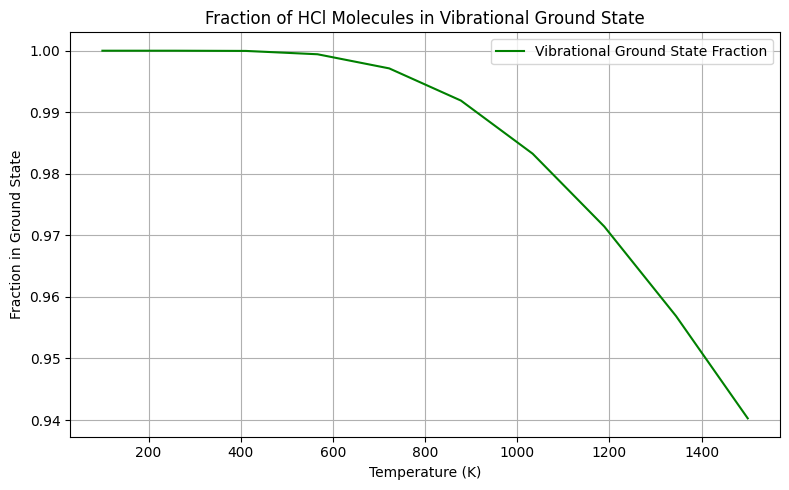

In [73]:
# Temperature
T_f = np.linspace(100, 1500, 10)

# Fraction in vibrational ground state
f_vib_0 = 1 - np.exp(-theta_vib / T_f)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(T_f, f_vib_0, label="Vibrational Ground State Fraction", color='green')
plt.xlabel("Temperature (K)")
plt.ylabel("Fraction in Ground State")
plt.title("Fraction of HCl Molecules in Vibrational Ground State")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [74]:
print(f_vib_0)

[1.         0.99999993 0.99996575 0.99942401 0.99712806 0.99189739
 0.98327156 0.97143064 0.95689213 0.94027473]


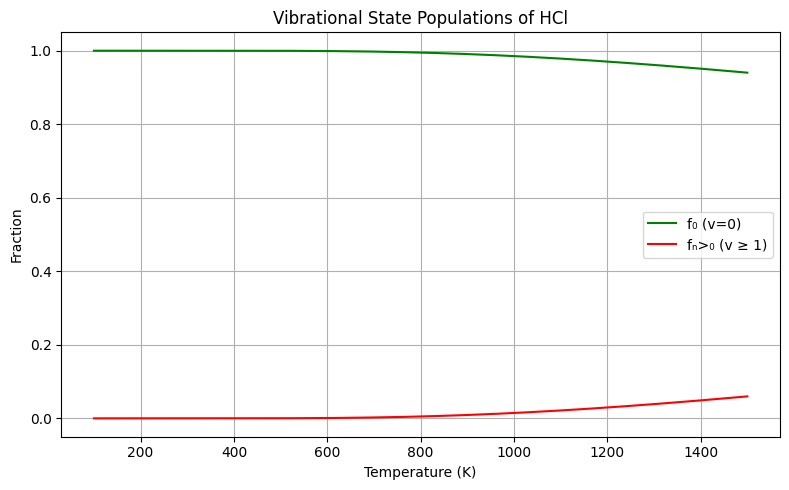

In [64]:
v_max = 10  # reasonable cutoff for visualization

f_v0 = 1 - np.exp(-theta_vib / T_f)
f_v_all = np.zeros((v_max + 1, len(T_f)))

# Calculate fractional population for each v level
for v in range(v_max + 1):
    exponent = -theta_vib * (v + 0.5) / T_f
    f_v_all[v] = np.exp(exponent)

# Normalize to get actual fractions (partition function denominator)
Z_vib = np.sum(f_v_all, axis=0)
f_v_all /= Z_vib  # broadcasting to normalize each temperature slice

# Sum of populations for v > 0
f_v_excited = np.sum(f_v_all[1:], axis=0)

# Temperature
T_f = np.linspace(100, 1500, 10)

# Fraction in vibrational ground state
f_vib_0 = 1 - np.exp(-theta_vib / T_f)

# Plot ground vs excited vibrational population fractions
plt.figure(figsize=(8, 5))
plt.plot(T_f, f_v_all[0], label="f₀ (v=0)", color='green')
plt.plot(T_f, f_v_excited, label="fₙ>₀ (v ≥ 1)", color='red')
plt.xlabel("Temperature (K)")
plt.ylabel("Fraction")
plt.title("Vibrational State Populations of HCl")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Fraction')

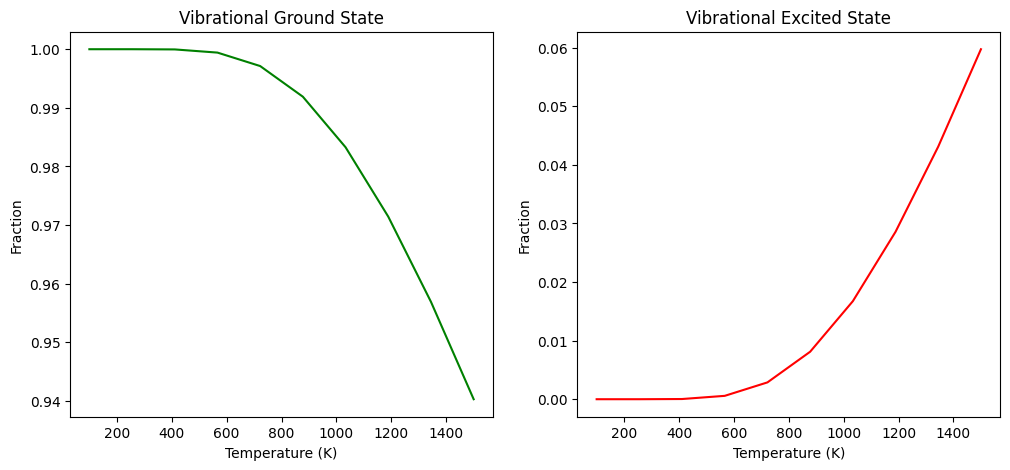

In [78]:
v_max = 10  # reasonable cutoff for visualization

f_v0 = 1 - np.exp(-theta_vib / T_f)
f_v_all = np.zeros((v_max + 1, len(T_f)))

# Calculate fractional population for each v level
for v in range(v_max + 1):
    exponent = -theta_vib * (v + 0.5) / T_f
    f_v_all[v] = np.exp(exponent)

# Normalize to get actual fractions (partition function denominator)
Z_vib = np.sum(f_v_all, axis=0)
f_v_all /= Z_vib  # broadcasting to normalize each temperature slice

# Sum of populations for v > 0
f_v_excited = np.sum(f_v_all[1:], axis=0)

# Temperature
T_f = np.linspace(100, 1500, 10)

# Fraction in vibrational ground state
f_vib_0 = 1 - np.exp(-theta_vib / T_f)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

axes[0].plot(T_f, f_v_all[0], label="f₀ (v=0)", color='green')
axes[0].set_title('Vibrational Ground State')
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Fraction')

axes[1].plot(T_f, f_v_excited, label="fₙ>₀ (v ≥ 1)", color='red')
axes[1].set_title('Vibrational Excited State')
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Fraction')


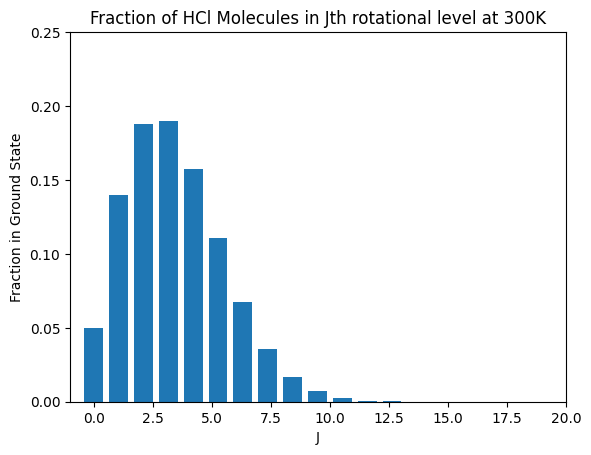

In [65]:
T = 300 #K
theta_rot = 15.02 # K

J = np.linspace(0,20,20)
num = (2*J) + 1
exp = np.exp(-theta_rot * J * (J+1) / T)
q_rot = T/theta_rot

f_j = (num*exp)/q_rot

plt.bar(J, f_j)
plt.xlabel("J")
plt.xlim(-1,20)
plt.ylim(0,0.25)
plt.ylabel("Fraction in Ground State")
plt.title("Fraction of HCl Molecules in Jth rotational level at 300K")
plt.show()

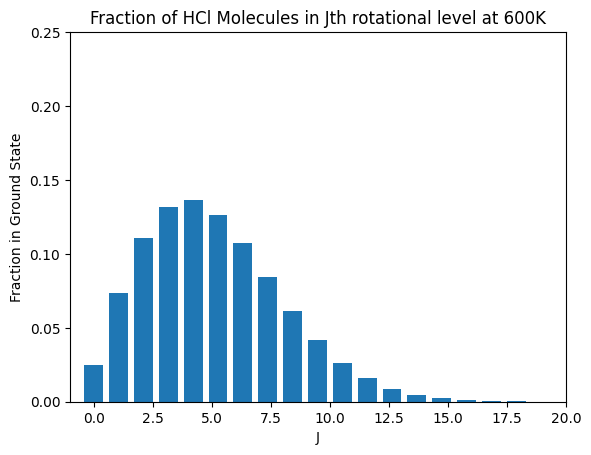

In [66]:
T = 600 #K
theta_rot = 15.02 # K

J = np.linspace(0,20,20)
num = (2*J) + 1
exp = np.exp(-theta_rot * J * (J+1) / T)
q_rot = T/theta_rot

f_j = (num*exp)/q_rot

plt.bar(J, f_j)
plt.xlabel("J")
plt.xlim(-1,20)
plt.ylim(0,0.25)
plt.ylabel("Fraction in Ground State")
plt.title("Fraction of HCl Molecules in Jth rotational level at 600K")
plt.show()

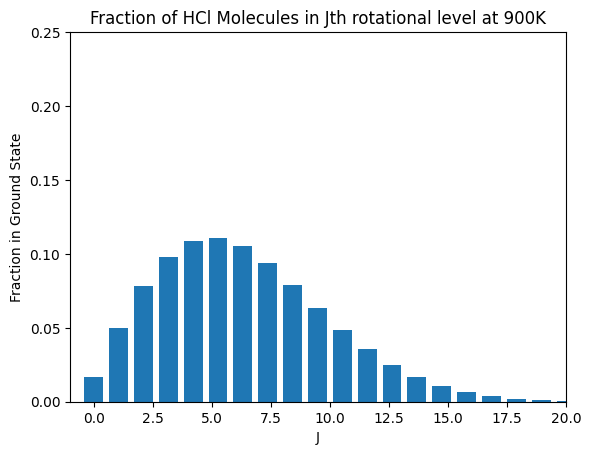

In [67]:
T = 900 #K
theta_rot = 15.02 # K

J = np.linspace(0,20,20)
num = (2*J) + 1
exp = np.exp(-theta_rot * J * (J+1) / T)
q_rot = T/theta_rot

f_j = (num*exp)/q_rot

plt.bar(J, f_j)
plt.xlabel("J")
plt.xlim(-1,20)
plt.ylim(0,0.25)
plt.ylabel("Fraction in Ground State")
plt.title("Fraction of HCl Molecules in Jth rotational level at 900K")
plt.show()

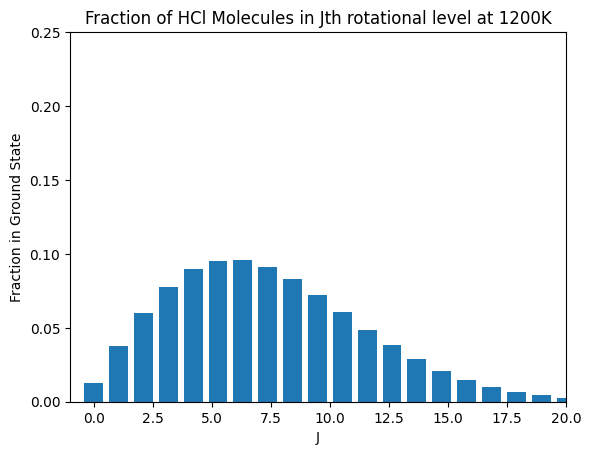

In [68]:
T = 1200 #K
theta_rot = 15.02 # K

J = np.linspace(0,20,20)
num = (2*J) + 1
exp = np.exp(-theta_rot * J * (J+1) / T)
q_rot = T/theta_rot

f_j = (num*exp)/q_rot

plt.bar(J, f_j)
plt.xlabel("J")
plt.xlim(-1,20)
plt.ylim(0,0.25)
plt.ylabel("Fraction in Ground State")
plt.title("Fraction of HCl Molecules in Jth rotational level at 1200K")
plt.show()

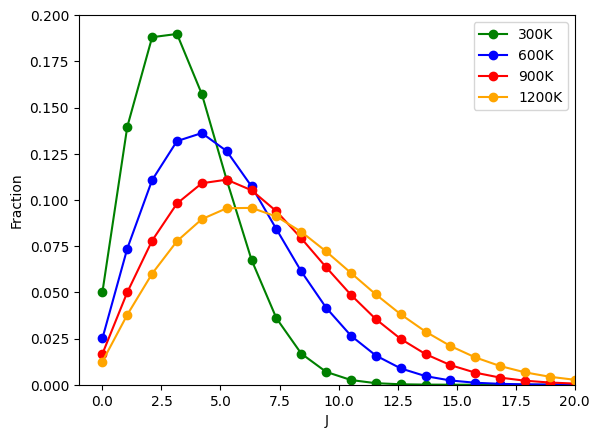

In [80]:
T3 = 300 #K
T6 = 600
T9 = 900
T12 = 1200
theta_rot = 15.02 # K

J = np.linspace(0,20,20)
num = (2*J) + 1
exp3 = np.exp(-theta_rot * J * (J+1) / T3)
q_rot3 = T3/theta_rot
exp6 = np.exp(-theta_rot * J * (J+1) / T6)
q_rot6 = T6/theta_rot
exp9 = np.exp(-theta_rot * J * (J+1) / T9)
q_rot9 = T9/theta_rot
exp12 = np.exp(-theta_rot * J * (J+1) / T12)
q_rot12 = T12/theta_rot


f_j3 = (num*exp3)/q_rot3
f_j6 = (num*exp6)/q_rot6
f_j9 = (num*exp9)/q_rot9
f_j12 = (num*exp12)/q_rot12

plt.plot(J, f_j3, label='300K', color='green', marker = 'o', alpha=1)
plt.plot(J, f_j6, label='600K', color='blue',marker = 'o', alpha=1)
plt.plot(J, f_j9, label='900K', color='red',marker = 'o', alpha=1)
plt.plot(J, f_j12, label='1200K', color='orange',marker = 'o', alpha=1)

plt.xlabel("J")
plt.xlim(-1,20)
plt.ylim(0,0.2)
plt.ylabel("Fraction")
plt.legend()
#plt.title("Fraction of HCl Molecules in Jth rotational level")
plt.show()

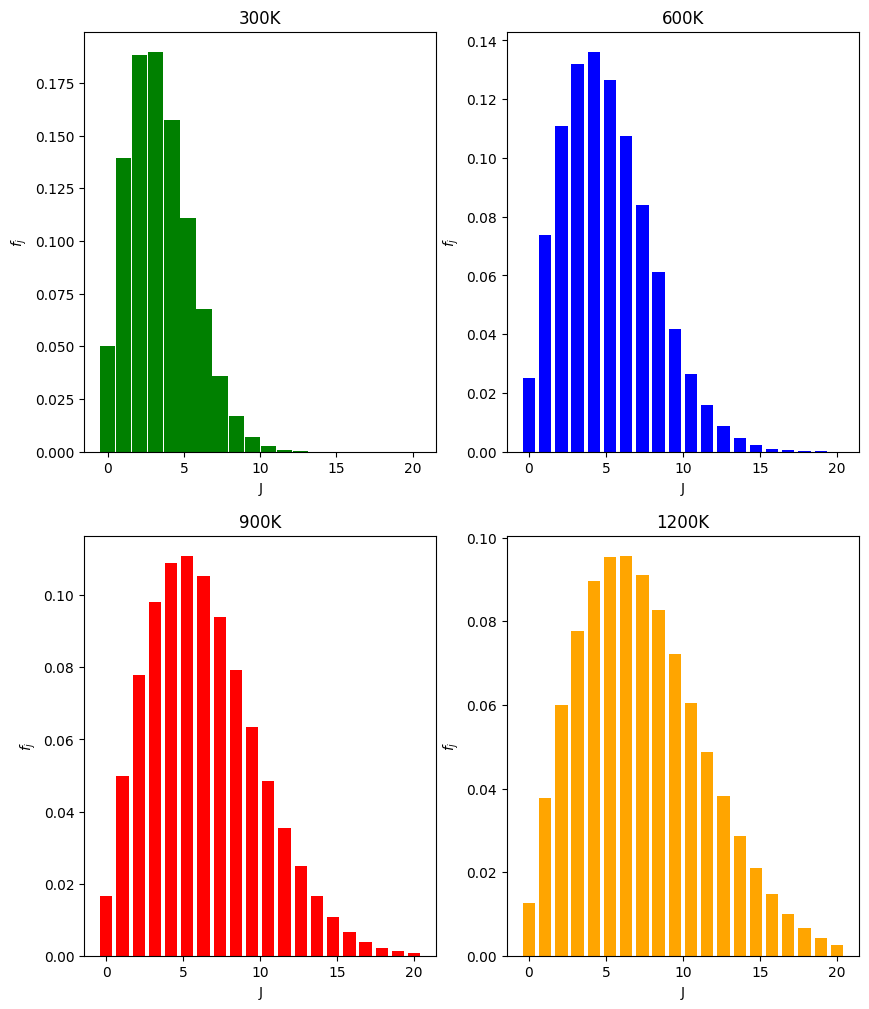

In [70]:
T3 = 300 #K
T6 = 600
T9 = 900
T12 = 1200
theta_rot = 15.02 # K

J = np.linspace(0,20,20)
num = (2*J) + 1
exp3 = np.exp(-theta_rot * J * (J+1) / T3)
q_rot3 = T3/theta_rot
exp6 = np.exp(-theta_rot * J * (J+1) / T6)
q_rot6 = T6/theta_rot
exp9 = np.exp(-theta_rot * J * (J+1) / T9)
q_rot9 = T9/theta_rot
exp12 = np.exp(-theta_rot * J * (J+1) / T12)
q_rot12 = T12/theta_rot

fig, axes = plt.subplots(2, 2, figsize=(10, 12))

f_j3 = (num*exp3)/q_rot3
f_j6 = (num*exp6)/q_rot6
f_j9 = (num*exp9)/q_rot9
f_j12 = (num*exp12)/q_rot12

axes[0, 0].bar(J, f_j3, color='green',width=1.0)
axes[0, 0].set_title('300K')
axes[0, 0].set_xlabel('J')
axes[0, 0].set_ylabel('$f_j$')

axes[0, 1].bar(J, f_j6, color='blue',alpha=1)
axes[0, 1].set_title('600K')
axes[0, 1].set_xlabel('J')
axes[0, 1].set_ylabel('$f_j$')

axes[1, 0].bar(J, f_j9, color='red',alpha=1)
axes[1, 0].set_title('900K')
axes[1, 0].set_xlabel('J')
axes[1, 0].set_ylabel('$f_j$')

axes[1, 1].bar(J, f_j12, color='orange',alpha=1)
axes[1, 1].set_title('1200K')
axes[1, 1].set_xlabel('J')
axes[1, 1].set_ylabel('$f_j$')
plt.show()